In [1]:
import numpy as np
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from random import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.utils import plot_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Convolution2D
from keras.optimizers import SGD
from keras.layers. normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

Using TensorFlow backend.


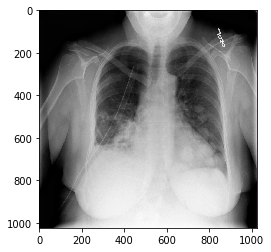

Complete load_data!


In [2]:
def data_loader_csv(path,columns=None):
    data = pd.read_csv(path)
    if not columns==None:
        data = data.filter(columns)
    return data

def image_reader(image_path, show='False'):
    image_arr = pydicom.read_file(image_path)
    image_arr = image_arr.pixel_array
    if show:
        plt.imshow(image_arr,cmap='gray')
        plt.show()
    return image_arr

def label_one_shot(label_value):
    if label_value == 0:
        return np.array([0, 1])
    elif label_value == 1:
        return np.array([1, 0])
    

def load_data(dataset, resize_size):
    data = []
    for i in range(len(dataset)):
        array_img = image_reader('../input/rsna-pneumonia-detection-challenge/stage_2_train_images/'+dataset[i][0]+'.dcm', show=False)
        img = Image.fromarray(array_img)
        img = img.resize(resize_size)
        array_img = np.array(img) / 255
        data.append([array_img, label_one_shot(dataset[i][1])])
        
    shuffle(data)
    
    return data
 
data_rsna = data_loader_csv('../input/rsna-pneumonia-detection-challenge/stage_2_train_labels.csv', ['patientId','Target'])
#data_rsna.head(10)
dataset = data_rsna.values

arr = image_reader('../input/rsna-pneumonia-detection-challenge/stage_2_train_images/'+dataset[0][0]+'.dcm', show=True) #/ test

image_height = int(arr.shape[0] / 8)  # Image size checking -> 128 x 128
image_width = int(arr.shape[1] / 8)

data_r = load_data(dataset, (image_width, image_height)) # Image size 128x128
print('Complete load_data!')

In [3]:
Images = np.array([i[0] for i in data_r]).reshape(-1, image_height, image_width, 1).astype('float32') # trainImages = Image size 128x128
Labels = np.array([i[1] for i in data_r]).astype('float32') # trainLabels
X_train, X_test, y_train, y_test = train_test_split(Images, Labels , test_size=0.1)

In [12]:
keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)

In [46]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(4, 4), strides=(1, 1), padding='same',activation='relu', input_shape= X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(16, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 128, 128, 8)       136       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
batch_normalization_21 (Batc (None, 64, 64, 8)         32        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 64, 16)        528       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
dropout_21 (Dropout)         (None, 32, 32, 16)        0         
__________

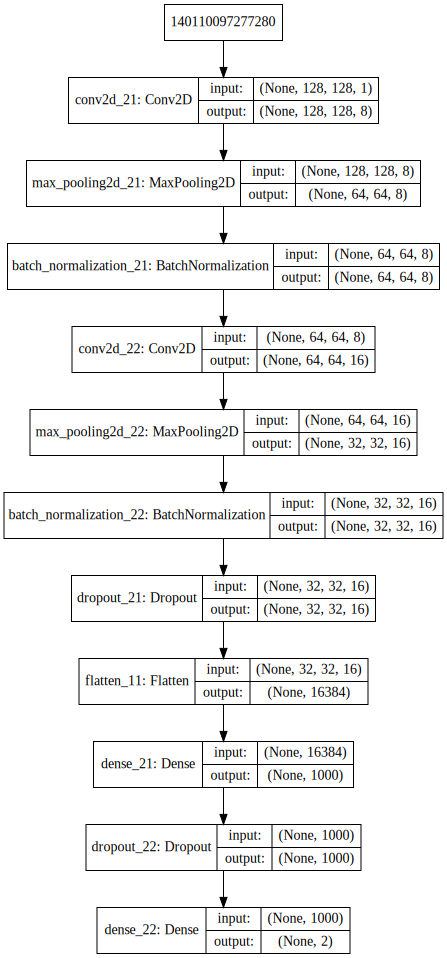

In [47]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [48]:
history = model.fit(X_train, y_train, validation_split = 0.1, batch_size = 50, epochs = 20, verbose = 1)

Train on 24483 samples, validate on 2721 samples
Epoch 1/20
24483/24483 [==============================] - 7s 299us/step - loss: 0.6622 - acc: 0.7486 - val_loss: 0.4688 - val_acc: 0.7685
Epoch 2/20
24483/24483 [==============================] - 6s 233us/step - loss: 0.4707 - acc: 0.7784 - val_loss: 0.4674 - val_acc: 0.7762
Epoch 3/20
24483/24483 [==============================] - 6s 232us/step - loss: 0.4568 - acc: 0.7854 - val_loss: 0.4564 - val_acc: 0.7832
Epoch 4/20
24483/24483 [==============================] - 6s 233us/step - loss: 0.4468 - acc: 0.7918 - val_loss: 0.4388 - val_acc: 0.7924
Epoch 5/20
24483/24483 [==============================] - 6s 233us/step - loss: 0.4367 - acc: 0.7962 - val_loss: 0.4410 - val_acc: 0.7898
Epoch 6/20
24483/24483 [==============================] - 6s 235us/step - loss: 0.4273 - acc: 0.8034 - val_loss: 0.4653 - val_acc: 0.7832
Epoch 7/20
24483/24483 [==============================] - 6s 233us/step - loss: 0.4158 - acc: 0.8104 - val_loss: 0.4358 - v

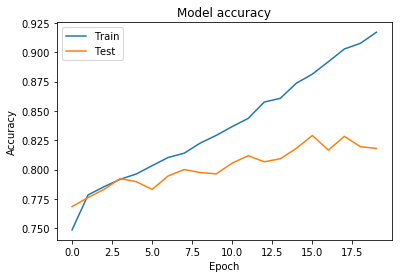

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

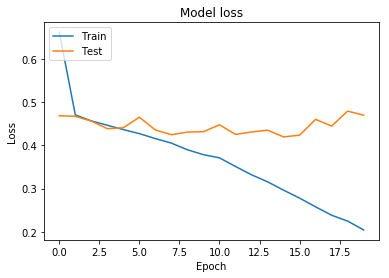

In [50]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

3023/3023 [==============================] - 0s 135us/step
Test Accuracy: 0.8144227588488256
Test Loss: 0.47433689975537413
